<a href="https://colab.research.google.com/github/FunSizeNanoByte/kitkats/blob/Collab/PA_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment:

BANA 320:     Predictive Analytics for Business
Due:          Oct 10 (Tuesday), 11:59pm
Homework 3:   Data Preparation using Python
Instructor:   Dr. Akash Gupta Points: 45

Download the data (telecomModified.csv) and address the questions below. A telecom operator, which has successfully launched a fourth-generation (4G) mobile telecommunications network, would like to utilize existing customer usage and demographic data to identify which customers are likely to switch to using their 4G network. A 4G customer is defined as one who possesses a 4G Subscriber Identity Module (SIM) card and currently uses a 4G network-compatible mobile phone.

1. (3 points) Import data using Python (using the pandas library) from telecomModified.csv. How
many rows and columns are in the dataset?

2. (2 points) As the data modeler for the company, you’re tasked to develop a predictive model to determine
the customer type.

       A. Identify your target variable’s name.

       B. Determine your target variable’s type.

       C. What type of problem are you addressing? (classification, regression, etc.)

3. (5 points) Remove the following columns from the table, naming the new dataframe telecomSelected:
• TOP1 INT CD
• TOP2 INT CD
• TOP3 INT CD
• OCCUP CD
• ID CHANGE FLAG

4. (5 points) Check the type of each variable in the telecomSelected dataset from Question 3. Adjust
any variables that don’t align with the types specified in the above table (Table 3.1).

5. (5 points) Derive summary statistics for each variable. Provide at least three personal observations.
Ensure each point reflects varied data understanding aspects.

6. (5 points) Create two filtered datasets named telecomCustType 3G and telecomCustType 4G. The for-
mer should include 3G customer types, and the latter should include 4G customer types.

7. (5 points) Using Python, identify all distinct payment methods, their count and then comment on the
most prevalent one.

8. (5 points) Perform mean imputation for variable AGE.

9. (5 points) Eliminate entries with missing GENDER data. Now using the cleaned dataset, compute the average age of both males and females.

10. (5 points) Create a histogram for the AGE variable. (Hint: Employ the matplotlib or seaborn library for this histogram.)

Deliverables:

1. Word File: Your Word file should include segments of the code (NO SCREENSHOT) that address
the specific answer. After each segment of the code should follow by the output, and the explanation
of the code. You can present the screenshot of the output from the console and the generated figure.
If you present the screenshot of whole screen, I will NOT grade your submission. Your Word file is the
most important document of the submission.

2. Python Code: Please submit your Python Code (.ipynb) file after adding the comments.
The instructor will select random students to explain their submissions


## #1
(3 points) Import data using Python (using the pandas library) from telecomModified.csv. How many rows and columns are in the dataset?

In [ ]:
#importing some core databases I know I'll need.
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('telecomModified.csv')
#opening the file and making a first dataframe.
df.head()
#a sample readout of what im working with. I still want more info on the quality of data though.

,Serial_Number,AGE,GENDER,MARITAL_STATUS,NATIONALITY,OCCUP_CD,LINE_TENURE,CUSTOMER_CLASS,SUBPLAN,CONTRACT_FLAG,PAY_METD,HS_AGE,TOP1_INT_CD,TOP2_INT_CD,TOP3_INT_CD,CUSTOMER_TYPE,ID_CHANGE_FLAG
0,1,26.0,F,M,702.0,NaN,575,3,2136,1.0,cs,18,105,NONE,NONE,4G,0
1,10,46.0,F,M,702.0,OTH,572,3,2242,1.0,co,1,NONE,NONE,NONE,4G,0
2,100,26.0,M,S,702.0,NaN,1252,3,2107,1.0,cs,0,NONE,NONE,NONE,4G,0
3,1000,38.0,M,S,702.0,NaN,2073,3,2102,1.0,cs,5,104,105,103,4G,0
4,10000,17.0,M,S,702.0,NaN,360,4,2242,1.0,cs,11,NONE,NONE,NONE,3G,0


In [ ]:
#checking variable types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial_Number   15000 non-null  int64  
 1   AGE             14589 non-null  float64
 2   GENDER          14997 non-null  object 
 3   MARITAL_STATUS  14193 non-null  object 
 4   NATIONALITY     14986 non-null  float64
 5   OCCUP_CD        5381 non-null   object 
 6   LINE_TENURE     15000 non-null  int64  
 7   CUSTOMER_CLASS  15000 non-null  int64  
 8   SUBPLAN         15000 non-null  int64  
 9   CONTRACT_FLAG   14224 non-null  float64
 10  PAY_METD        14257 non-null  object 
 11  HS_AGE          15000 non-null  int64  
 12  TOP1_INT_CD     15000 non-null  object 
 13  TOP2_INT_CD     15000 non-null  object 
 14  TOP3_INT_CD     15000 non-null  object 
 15  CUSTOMER_TYPE   15000 non-null  object 
 16  ID_CHANGE_FLAG  15000 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
#checking for missing values
df.isna().sum()
#there's a lot.

Serial_Number        0
AGE                411
GENDER               3
MARITAL_STATUS     807
NATIONALITY         14
OCCUP_CD          9619
LINE_TENURE          0
CUSTOMER_CLASS       0
SUBPLAN              0
CONTRACT_FLAG      776
PAY_METD           743
HS_AGE               0
TOP1_INT_CD          0
TOP2_INT_CD          0
TOP3_INT_CD          0
CUSTOMER_TYPE        0
ID_CHANGE_FLAG       0
dtype: int64

##2. (2 points) As the data modeler for the company, you’re tasked to develop a predictive model to determine

the customer type.

       A. Identify your target variable’s name.
CUSTOMER_TYPE

       B. Determine your target variable’s type.
OBJECT

       C. What type of problem are you addressing? (classification, regression, etc.)
CLASSIFICATION


##3. (5 points) Remove the following columns from the table, naming the new dataframe telecomSelected: • TOP1 INT CD • TOP2 INT CD • TOP3 INT CD • OCCUP CD • ID CHANGE FLAG

In [ ]:
telecomSelected=df.drop(['TOP1_INT_CD','TOP2_INT_CD','TOP3_INT_CD','OCCUP_CD','ID_CHANGE_FLAG'],axis=1)
#this drops the columns listed. only name changes were _ was needed instead of spaces.
telecomSelected.head(1)
#one readout can comfirm they're gone.

,Serial_Number,AGE,GENDER,MARITAL_STATUS,NATIONALITY,LINE_TENURE,CUSTOMER_CLASS,SUBPLAN,CONTRACT_FLAG,PAY_METD,HS_AGE,CUSTOMER_TYPE
0,1,26.0,F,M,702.0,575,3,2136,1.0,cs,18,4G


##4. (5 points) Check the type of each variable in the telecomSelected dataset from Question 3. Adjust any variables that don’t align with the types specified in the above table (Table 3.1).

In [ ]:
telecomSelected.info()
#getting Dtype readouts to see what's off: cross referencing table 3.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial_Number   15000 non-null  int64  
 1   AGE             14589 non-null  float64
 2   GENDER          14997 non-null  object 
 3   MARITAL_STATUS  14193 non-null  object 
 4   NATIONALITY     14986 non-null  float64
 5   LINE_TENURE     15000 non-null  int64  
 6   CUSTOMER_CLASS  15000 non-null  int64  
 7   SUBPLAN         15000 non-null  int64  
 8   CONTRACT_FLAG   14224 non-null  float64
 9   PAY_METD        14257 non-null  object 
 10  HS_AGE          15000 non-null  int64  
 11  CUSTOMER_TYPE   15000 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 1.4+ MB


In [ ]:
telecomSelected['NATIONALITY']=telecomSelected['NATIONALITY'].astype('object')
telecomSelected['CUSTOMER_CLASS']=telecomSelected['CUSTOMER_CLASS'].astype('object')
telecomSelected['SUBPLAN']=telecomSelected['SUBPLAN'].astype('object')
telecomSelected['CONTRACT_FLAG']=telecomSelected['CONTRACT_FLAG'].astype('object')
telecomSelected['HS_AGE']=telecomSelected['HS_AGE'].astype('float64')
#these are the values that need to change and what type I want them as.
telecomSelected.info()
#A last read out to comfirm changes were made
 #(I could also just run the code above this again, but I want a linear change shown)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial_Number   15000 non-null  int64  
 1   AGE             14589 non-null  float64
 2   GENDER          14997 non-null  object 
 3   MARITAL_STATUS  14193 non-null  object 
 4   NATIONALITY     14986 non-null  object 
 5   LINE_TENURE     15000 non-null  int64  
 6   CUSTOMER_CLASS  15000 non-null  object 
 7   SUBPLAN         15000 non-null  object 
 8   CONTRACT_FLAG   14224 non-null  object 
 9   PAY_METD        14257 non-null  object 
 10  HS_AGE          15000 non-null  float64
 11  CUSTOMER_TYPE   15000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ MB


##5. (5 points) Derive summary statistics for each variable. Provide at least three personal observations.
Ensure each point reflects varied data understanding aspects.

In [ ]:
telecomSelected.describe()
#.describe() is how we can get some statistical information.
#count of values, average, std deviation, quartiles, and min/max

,Serial_Number,AGE,LINE_TENURE,HS_AGE
count,15000.000000,14589.000000,15000.000000,15000.000000
mean,9227.486467,37.312976,1334.683133,12.973267
std,5556.382091,10.923090,742.935552,12.094937
min,1.000000,7.000000,180.000000,0.000000
25%,4049.750000,29.000000,663.000000,4.000000
50%,10500.500000,36.000000,1318.500000,10.000000
75%,14250.250000,45.000000,1908.000000,19.000000
max,18000.000000,89.000000,3131.000000,60.000000


Serial_Number is more an identifier(or data key) rather than data we want to observe.

AGE is showing the average age of our customers is 37. this however, doesn't mean we should align ourselves for that demographic.

LINE_TENURE is how long customers have been with us. I believe this is measured in days. our data only has those with over 6 years, the longest going for more than 104 years!

HS_AGE I think is household age, the average age of users measured in years.

##6. (5 points) Create two filtered datasets named telecomCustType 3G and telecomCustType 4G. The former should include 3G customer types, and the latter should include 4G customer types.

In [ ]:
telecomCustType_3G=telecomSelected.loc[telecomSelected['CUSTOMER_TYPE'] == '3G']
# using .loc on the newer telecomSelected dataset for 3G list.
telecomCustType_3G['CUSTOMER_TYPE'].value_counts()
#showing my data set

3G    12299
Name: CUSTOMER_TYPE, dtype: int64

In [ ]:
#repeat for 4G.
telecomCustType_4G=telecomSelected.loc[telecomSelected['CUSTOMER_TYPE'] == '4G']
telecomCustType_4G['CUSTOMER_TYPE'].value_counts()

4G    2701
Name: CUSTOMER_TYPE, dtype: int64

##7. (5 points) Using Python, identify all distinct payment methods, their count and then comment on the most prevalent one.

In [ ]:
telecomSelected['PAY_METD'].value_counts()
# .value_counts will show me a list of values and also how many times they show up.

cs    11230
dd     1208
co     1082
cg      606
cx      131
Name: PAY_METD, dtype: int64

cs is the most common payment method by far. I have no idea what it stands for. could mean cash.

##8. (5 points) Perform mean imputation for variable AGE.

In [ ]:
#we make a value for mean
telecomSelected_mean_AGE=telecomSelected['AGE'].mean()
#we have a new value
telecomSelected_mean_AGE

37.312975529508535

In [ ]:
#fill in NULL values of
telecomSelected['AGE'].fillna(telecomSelected_mean_AGE,inplace=True)
#i dont like this code! because it rewrites my current database without keeping the previous version.
telecomSelected['AGE'].isna().sum()
#verifying 0 left.

0

##9. (5 points) Eliminate entries with missing GENDER data. Now using the cleaned dataset, compute the average age of both males and females.

In [ ]:
telecomselected_nullgndr_removed=telecomSelected[['GENDER','AGE']].dropna()
#making a new dataset with dropna for 'gender'.
#I dont have any Null values in AGE now but i want it in my dataset and this is a shortcut for a lean data set.
telecomselected_nullgndr_removed


,GENDER,AGE
0,F,26.0
1,F,46.0
2,M,26.0
3,M,38.0
4,M,17.0
...,...,...
14995,F,45.0
14996,M,40.0
14997,M,28.0
14998,M,30.0


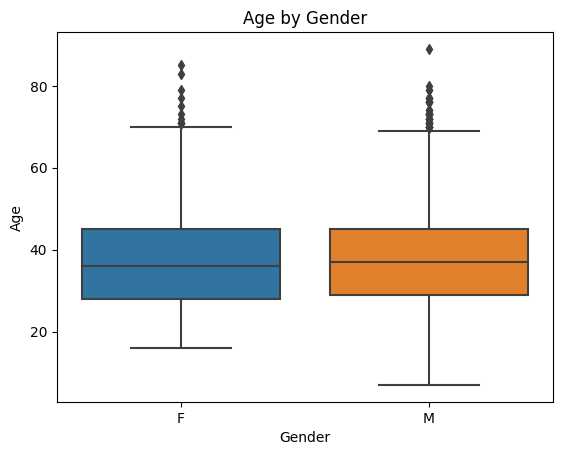

In [ ]:
from sqlalchemy.sql.expression import true
import matplotlib.pyplot as plt

sns.boxplot(x='GENDER',y='AGE', data=telecomselected_nullgndr_removed)
#making a box plot, seperated by gender. weighing age.
plt.title("Age by Gender")
plt.xlabel("Gender")
#we add the second y label to capitalize properly
plt.ylabel("Age")
plt.show()
#seaborn makes this automatically show. even if there is no plt.show()

In [ ]:
#this gave me my answer but i need to eyeball it. I dont think this is sufficient.
telecomselected_nullgndr_removed.groupby(['GENDER']).mean()
#had to look up the .groupby function, i cant remember how we split the categories in class.

,AGE
GENDER,
F,36.750154
M,37.715791


Average Female age is 36.8

Average Male age is 37.7

##10. (5 points) Create a histogram for the AGE variable. (Hint: Employ the matplotlib or seaborn library for this histogram.)

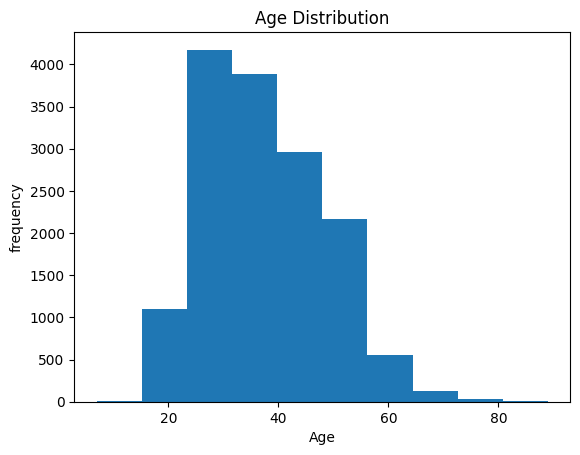

In [ ]:
plt.hist(telecomSelected['AGE'])
#this is mathplt's histogram function
plt.title("Age Distribution")
#this is a distribution of ages
plt.xlabel("Age")
#my X should be Age but it would auto place AGE(all caps)
plt.ylabel("frequency")
plt.show()